In [3]:
import pandas as pd
%matplotlib inline

In [4]:
Data = pd.read_excel('SACovidData.xlsx')

In [5]:
Data.head(6)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
1,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
2,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,1573.2,2.81,8.1,26.201661
3,ZAF,Africa,South Africa,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
4,ZAF,Africa,South Africa,2020-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
5,ZAF,Africa,South Africa,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN


Cleaning the data

In [6]:
#Having a look at all the column names we have
Data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
#Droping the columns that we do not need for predicton,
#The reamaining columns will be the features for prediction

data1 = Data.drop(['iso_code','continent', 'location', 'new_cases_smoothed', 'new_deaths_smoothed', 
          'total_cases_per_million','new_cases_per_million', 'new_cases_smoothed_per_million',
           'total_deaths_per_million', 'new_deaths_per_million','new_deaths_smoothed_per_million',
           'reproduction_rate','total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand','new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred','new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred',
        'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million',
        'tests_units'
          ], axis = 1)

In [8]:
data2 = data1.fillna(0)
data2.tail(6)

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
669,2021-12-07,3051222.0,13147.0,90002.0,27.0,52890.0,19838883.0,0.2299,4.4,26639293.0,18053081.0,15104933.0,0.0,148877.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
670,2021-12-08,3071064.0,19842.0,90038.0,36.0,73911.0,19912794.0,0.2461,4.1,26781642.0,18157324.0,15182986.0,0.0,142349.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
671,2021-12-09,3093452.0,22388.0,90060.0,22.0,75251.0,19988045.0,0.2583,3.9,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
672,2021-12-10,3112469.0,19017.0,90080.0,20.0,83515.0,20071560.0,0.2547,3.9,27043034.0,18344024.0,15330635.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
673,2021-12-11,3129622.0,17153.0,90116.0,36.0,104831.0,20176391.0,0.2364,4.2,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0
674,2021-12-12,3167497.0,37875.0,90137.0,21.0,62414.0,20238805.0,0.2847,3.5,0.0,0.0,0.0,0.0,0.0,0.0,60041996,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,0.0,0.0,0.0,0.0


In [9]:
from datetime import datetime
data2.date = pd.to_datetime(data2.date, format = '%Y-%m-%d')
#data2.set_index('date', inplace = True)

Visualize the data

In [10]:
data2.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'new_tests', 'total_tests', 'positive_rate', 'tests_per_case',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'total_boosters', 'new_vaccinations', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

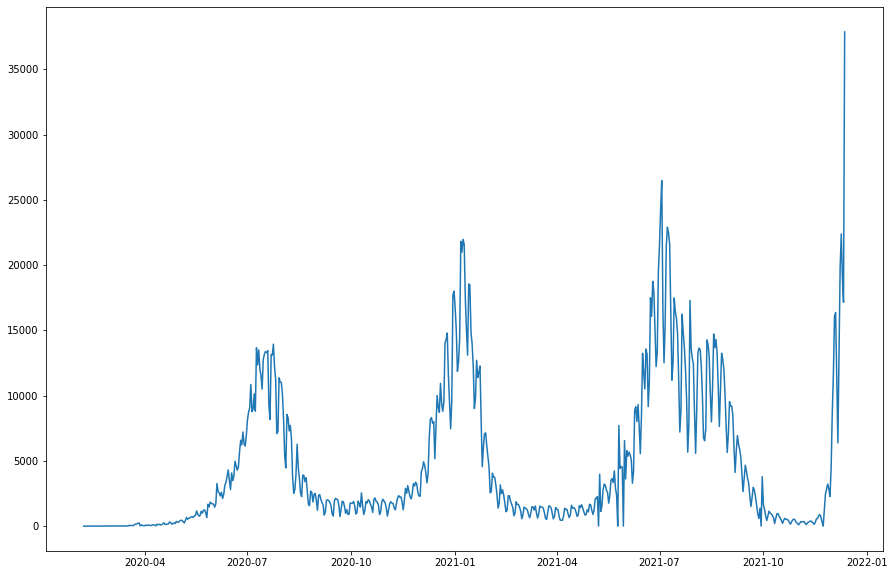

In [12]:

plt.figure(1)
plt.figure(figsize=(15, 10))
plt.plot(data2.date, data2.new_cases)
plt.show()

Divide the dataset into training and testing purpose

In [13]:
data2.set_index('date', inplace = True)

In [14]:
data2_train = data2['2020-02-07':'2021-05-30']

In [15]:
data2_test = data2['2021-06-01':]

Building and Training the model

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
#The code given below would be executed for preparing the train and test dataset(generator_train and generator_test ) which would be used in the tensorflow model
generator_train = TimeseriesGenerator(data2_train['new_cases'],
                                      data2_train['new_cases'],
                                      length = 5, batch_size = 1)

In [19]:
generator_train[0]

(array([[0., 0., 0., 0., 0.]]), array([0.]))

In [126]:
data2_train['new_cases'].head(6)

date
2020-02-07    0.0
2020-02-08    0.0
2020-02-09    0.0
2020-02-10    0.0
2020-02-11    0.0
2020-02-12    0.0
Name: new_cases, dtype: float64

In [127]:
generator_test = TimeseriesGenerator(data2_test['new_cases'],
                                      data2_test['new_cases'],
                                      length = 194, batch_size = 1)

In [128]:
generator_test[0]

(array([[ 3614.,  5782.,  5360.,  5668.,  5450.,  5073.,  3285.,  4209.,
          8881.,  9147.,  8020.,  9319.,  7657.,  5548.,  8436., 13246.,
         11767., 10510., 13575., 13155.,  9160., 11093., 17493., 16078.,
         18762., 17956., 15036., 12222., 13347., 19506., 21584., 24270.,
         26485., 16585., 12513., 15500., 21427., 22910., 22441., 21610.,
         16302., 11182., 12535., 17489., 16435., 15939., 14701., 11215.,
          7209.,  8928., 16240., 14858., 13719., 12056.,  9718.,  5667.,
          7733., 17302., 13626., 12885., 12418.,  8730.,  5574.,  8988.,
         13263., 13646., 13523., 12310.,  9978.,  6756.,  6540.,  7478.,
         14271., 13916., 13020., 10139.,  7983., 10685., 14727., 13671.,
         14312., 13261., 10748.,  7632., 10346., 13251., 12771., 12045.,
         10173.,  7740.,  5644.,  7084.,  9544.,  9202.,  9199.,  8410.,
          5931.,  4118.,  5771.,  6939.,  6269.,  5883.,  5309.,  3961.,
          2640.,  3699.,  4667.,  4214.,  3648.,  3

In [129]:
data2_test['new_cases'].head(6)

date
2021-06-01    3614.0
2021-06-02    5782.0
2021-06-03    5360.0
2021-06-04    5668.0
2021-06-05    5450.0
2021-06-06    5073.0
Name: new_cases, dtype: float64

set random.set.seed() which would ‘lock’ the pseudo-random number generator, for assisting replicable analysis while using the the tensorflow model

In [1]:
tf.random.set_seed(13)
model_1 = tf.keras.Sequential([
tf.keras.layers.Dense(256, activation='relu',input_dim=34),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dense(1)
])

NameError: ignored

In [168]:
model_1.summary()
model_1.compile(optimizer ='adam', loss='mse', metrics = 'mae')

ValueError: ignored

In [164]:
history= model_1.fit(generator_train, epochs= 360, validation_data =generator_test)
history.history
result =pd.DataFrame(history.history)
result.head(10)
result[['loss', 'val_loss']].plot()

Epoch 1/360


InvalidArgumentError: ignored

In [160]:
data2.columns.shape

(33,)